# Lesson 09 - Workalong 2, Step 1
This notebook develops and tests the code for a function that generates a plot of some interesting weather.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cmocean
import os

In [2]:
# set the path to the input data file
#input_file = "/N/project/obrienta_startup/datasets/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc"
input_file = "/N/scratch/obrienta/easg690/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc"

# set the directory where we'll save the images
output_dir = "./animation_frames"

# set the timestep to plot
i = 0

# make sure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# load the data file (chunks=-1 prevents the whole file from loading at once)
ds_in = xr.open_dataset(input_file, chunks = -1)
ds_in

<xarray.Dataset>
Dimensions:    (time: 720, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2021-06-01 ... 2021-06-30T23:00:00
Data variables:
    TCW        (time, latitude, longitude) float32 dask.array<chunksize=(720, 721, 1440), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r4i1n35 4.12.14-95.51-default #1 SMP Fri Apr ...
    CONVERSION_DATE:      Fri Sep  3 11:04:41 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Sep  3 11:04:57 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

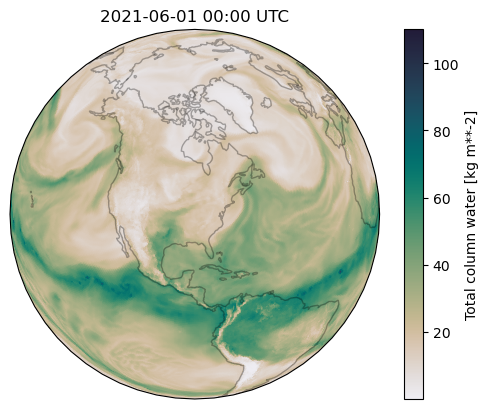

In [3]:
# get the variable at the requested timestep
tcw = ds_in['TCW'].isel(time = 0)

# plot the variable on an orthographic projection centered on
# Bloomington, IN
clat = 39.1653
clon = -86.5264
projection = cartopy.crs.Orthographic(central_latitude=clat, central_longitude=clon)
transform = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(1,1, subplot_kw = dict(projection = projection))

# plot the data
tcw.plot(
    ax = ax,
    cmap = cmocean.cm.rain,
    transform = transform,
)

# get the time of the timestep
time = tcw.time

# convert it to a datetime object
time_dt = pd.to_datetime(time.values)

# add a title with a nicely formatted date
ax.set_title(time_dt.strftime("%Y-%m-%d %H:%M UTC"))

# add coastlines
ax.coastlines(alpha = 0.3)

# save the plot
output_file = os.path.join(output_dir,f"tcw_{i:05}.png")
plt.savefig(output_file, dpi = 300, bbox_inches = 'tight')

plt.show()

In [4]:
""" Make a function to plot and save the data at a given timestep. """

def generate_frame(
        i : int,
        input_file = "/N/project/obrienta_startup/datasets/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc",
        output_dir = "./animation_frames/"):

        # make sure the output directory exists
        os.makedirs(output_dir, exist_ok=True)

        # load the data file (chunks=-1 prevents the whole file from loading at once)
        ds_in = xr.open_dataset(input_file, chunks = -1)

        # get the variable at the requested timestep
        tcw = ds_in['TCW'].isel(time = 0)

        # turn off inline plotting
        plt.ioff()

        # plot the variable on an orthographic projection centered on
        # Bloomington, IN
        clat = 39.1653
        clon = -86.5264
        projection = cartopy.crs.Orthographic(central_latitude=clat, central_longitude=clon)
        transform = cartopy.crs.PlateCarree()
        fig, ax = plt.subplots(1,1, subplot_kw = dict(projection = projection))

        # plot the data
        tcw.plot(
        ax = ax,
        cmap = cmocean.cm.rain,
        transform = transform,
        )

        # get the time of the timestep
        time = tcw.time

        # convert it to a datetime object
        time_dt = pd.to_datetime(time.values)

        # add a title with a nicely formatted date
        ax.set_title(time_dt.strftime("%Y-%m-%d %H:%M UTC"))

        # add coastlines
        ax.coastlines(alpha = 0.3)

        # save the plot
        output_file = os.path.join(output_dir,f"tcw_{i:05}.png")
        plt.savefig(output_file, dpi = 300, bbox_inches = 'tight')

        # close the plot
        plt.close()


In [5]:
""" Test the function. """

# set the timestep to plot (select a new timestep)
i = 10

# generate the plot
generate_frame(i)